In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt 


In [2]:
data = pd.read_csv(r"C:\Users\Bubay.eze\Documents\data sci csv files\diabetes_prediction_dataset.csv")
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# Data profiling

In [3]:
result=  data.shape
print(f"There are {result[0]} rows and {result[1]} columns in the dataset")

There are 100000 rows and 9 columns in the dataset


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
data.duplicated().sum()

3854

In [6]:
data = data.drop_duplicates() # dropping duplicates

# EDA

In [7]:
gender_dist =data["gender"].value_counts()
gender_dist

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

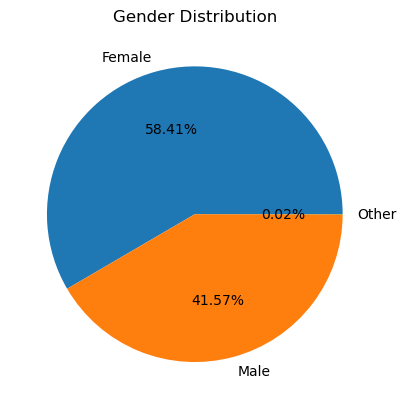

In [8]:
plt.title("Gender Distribution")
plt.pie(x = gender_dist.values,labels = gender_dist.index, autopct= "%2.2f%%")
plt.show()

<Axes: xlabel='age', ylabel='Count'>

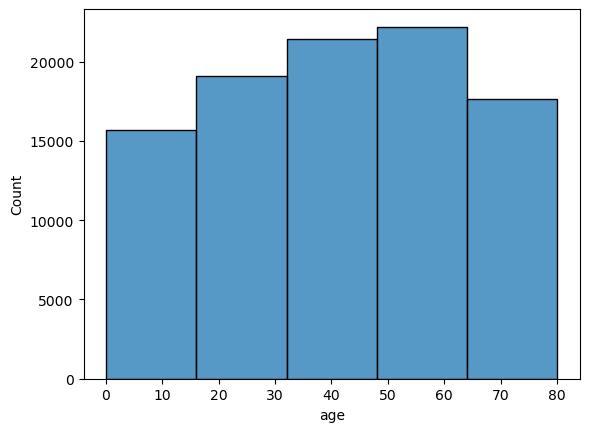

In [9]:
sns.histplot(data["age"], bins =5)

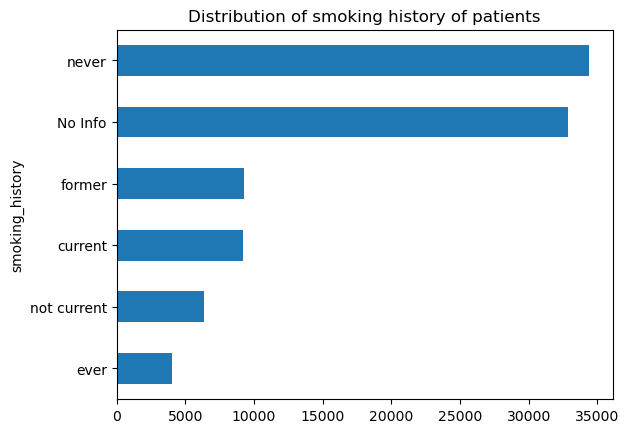

In [10]:
distribution =data["smoking_history"].value_counts().sort_values()
distribution.plot(kind = "barh")
plt.title("Distribution of smoking history of patients")
plt.show()

<Axes: ylabel='bmi'>

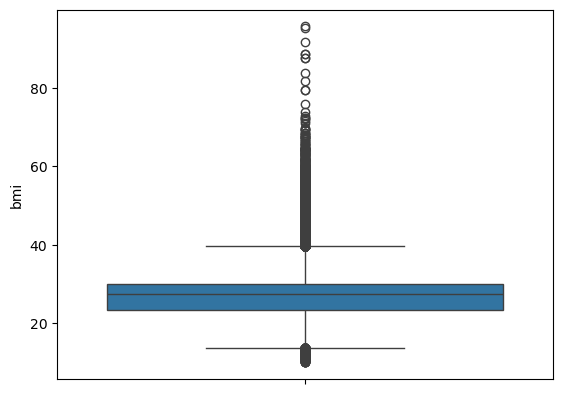

In [11]:
sns.boxplot(data["bmi"])

<Axes: xlabel='bmi', ylabel='Density'>

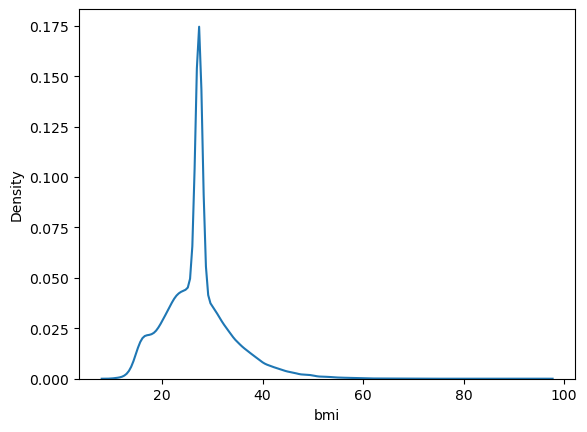

In [12]:
sns.kdeplot(data["bmi"])

<Axes: xlabel='HbA1c_level', ylabel='Density'>

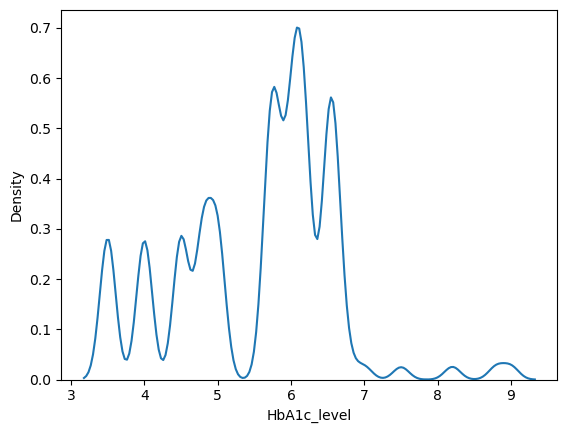

In [13]:
sns.kdeplot(data["HbA1c_level"])

<Axes: xlabel='blood_glucose_level', ylabel='Density'>

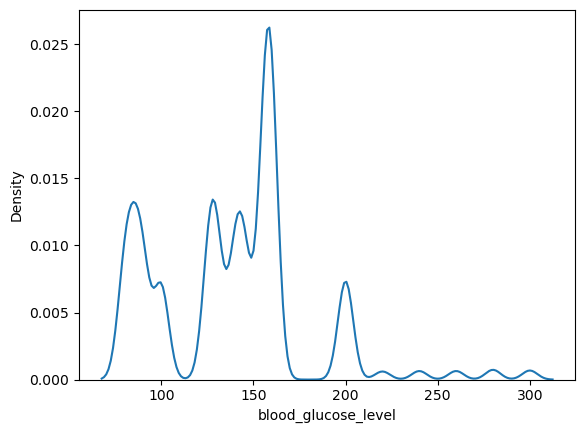

In [14]:
sns.kdeplot(data["blood_glucose_level"])

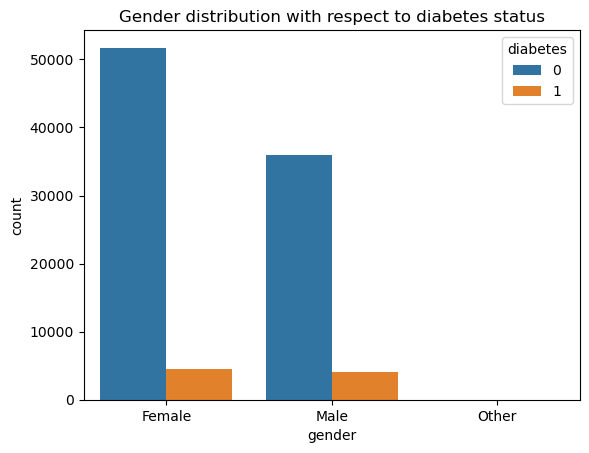

In [15]:
sns.countplot(x = "gender", hue = "diabetes", data = data)
plt.title("Gender distribution with respect to diabetes status")
plt.show()

In [16]:
result =pd.crosstab(index = data["gender"],
            columns = data["diabetes"]
           )
result["probabilities"] = round(result[1] / (result[1] + result[0]),4)
result.style.background_gradient(cmap = "Reds") 

diabetes,0,1,probabilities
gender,,,
Female,51714,4447,0.079200
Male,35932,4035,0.101000
Other,18,0,0.000000


In [17]:
data["age_category"] = pd.cut(data["age"],bins = [0,20,40,60,80],
                       labels = ["young","young adult","adult","old"]
                       )

C:\Users\Bubay.eze\AppData\Local\Temp\ipykernel_7020\858604852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["age_category"] = pd.cut(data["age"],bins = [0,20,40,60,80],


<Axes: xlabel='age_category', ylabel='count'>

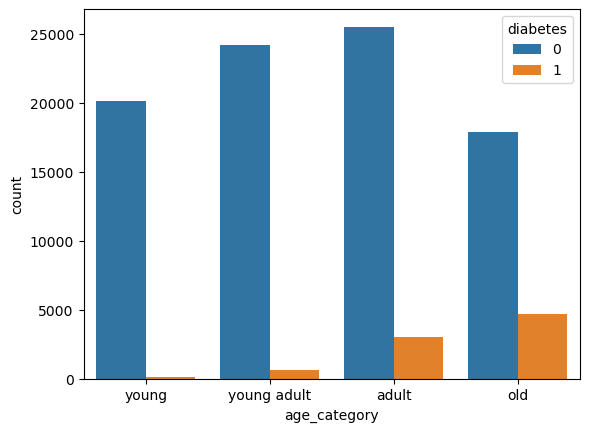

In [18]:
sns.countplot(x="age_category", hue = "diabetes",
             data = data)

In [19]:
result =pd.crosstab(index = data["age_category"],
            columns = data["diabetes"]
           )
result["probabilities"] = round(result[1] / (result[1] + result[0]),4)
result.style.background_gradient(cmap = "Reds") 

diabetes,0,1,probabilities
age_category,,,
young,20099,113,0.005600
young adult,24165,667,0.026900
adult,25501,2996,0.105100
old,17899,4706,0.208200


<Axes: xlabel='hypertension', ylabel='count'>

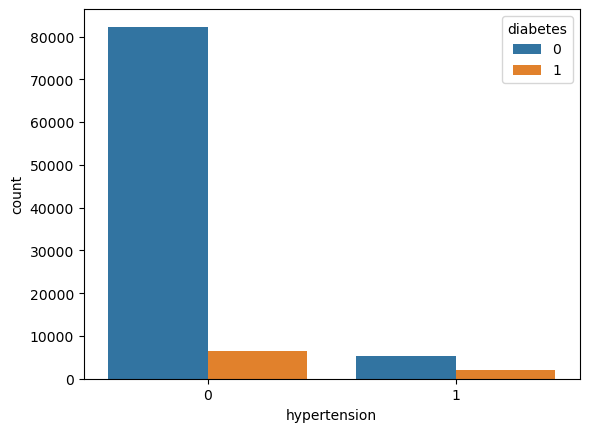

In [20]:
sns.countplot(x="hypertension", hue = "diabetes",
             data = data)

In [21]:
result =pd.crosstab(index = data["hypertension"],
            columns = data["diabetes"]
           )
result["probabilities"] = round(result[1] / (result[1] + result[0]),4)
result.style.background_gradient(cmap = "Reds") 

diabetes,0,1,probabilities
hypertension,,,
0,82289,6396,0.072100
1,5375,2086,0.279600


<Axes: xlabel='bmi', ylabel='diabetes'>

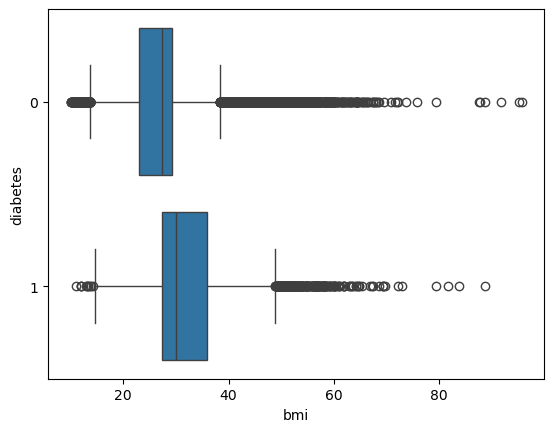

In [22]:
sns.boxplot(x = "bmi", y = data["diabetes"].astype("str"),
            data = data)

<Axes: xlabel='HbA1c_level', ylabel='diabetes'>

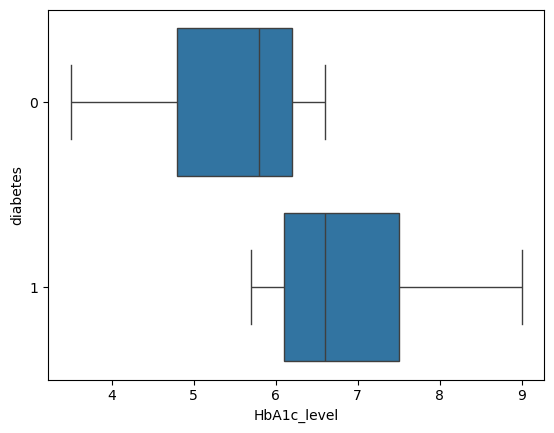

In [23]:
sns.boxplot(x = "HbA1c_level", y = data["diabetes"].astype("str"),
            data = data)

In [24]:
data["HbA1c_level_category"] = pd.cut(data["HbA1c_level"],bins = [2,4,6.5,9],
                       labels = ["low","average","high"]
                       )
data

C:\Users\Bubay.eze\AppData\Local\Temp\ipykernel_7020\3642713965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["HbA1c_level_category"] = pd.cut(data["HbA1c_level"],bins = [2,4,6.5,9],


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_category,HbA1c_level_category
0,Female,80.0,0,1,never,25.19,6.6,140,0,old,high
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,adult,high
2,Male,28.0,0,0,never,27.32,5.7,158,0,young adult,average
3,Female,36.0,0,0,current,23.45,5.0,155,0,young adult,average
4,Male,76.0,1,1,current,20.14,4.8,155,0,old,average
...,...,...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0,young adult,average
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0,young,average
99997,Male,66.0,0,0,former,27.83,5.7,155,0,old,average
99998,Female,24.0,0,0,never,35.42,4.0,100,0,young adult,low


In [25]:
result =pd.crosstab(index = data["HbA1c_level_category"],
            columns = data["diabetes"]
           )
result["probabilities"] = round(result[1] / (result[1] + result[0]),4)
result.style.background_gradient(cmap = "Reds") 

diabetes,0,1,probabilities
HbA1c_level_category,,,
low,14524,0,0.000000
average,65658,3912,0.056200
high,7482,4570,0.379200


In [26]:
model_data = data.drop(columns = ["HbA1c_level_category",
                                  "age_category"]
                      )
model_data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


## Feature Engineerring

In [27]:
model_data = pd.get_dummies(columns = ["gender"],
              data = model_data, dtype = "int",
              drop_first = True)

In [28]:
mapping =model_data["smoking_history"].value_counts().to_dict()
model_data["smoking_history"].replace(mapping, inplace =True)

C:\Users\Bubay.eze\AppData\Local\Temp\ipykernel_7020\797450282.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  model_data["smoking_history"].replace(mapping, inplace =True)
C:\Users\Bubay.eze\AppData\Local\Temp\ipykernel_7020\797450282.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  model_da

In [29]:
model_data

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other
0,80.0,0,1,34398,25.19,6.6,140,0,0,0
1,54.0,0,0,32887,27.32,6.6,80,0,0,0
2,28.0,0,0,34398,27.32,5.7,158,0,1,0
3,36.0,0,0,9197,23.45,5.0,155,0,0,0
4,76.0,1,1,9197,20.14,4.8,155,0,1,0
...,...,...,...,...,...,...,...,...,...,...
99994,36.0,0,0,32887,24.60,4.8,145,0,0,0
99996,2.0,0,0,32887,17.37,6.5,100,0,0,0
99997,66.0,0,0,9299,27.83,5.7,155,0,1,0
99998,24.0,0,0,34398,35.42,4.0,100,0,0,0


In [30]:
from sklearn.preprocessing import MinMaxScaler
x = model_data.drop(columns ="diabetes")
y = model_data["diabetes"]
scaler = MinMaxScaler()
array = scaler.fit_transform(x)
x = pd.DataFrame(array,columns = x.columns)
x


,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other
0,1.000000,0.0,1.0,1.000000,0.177171,0.563636,0.272727,0.0,0.0
1,0.674675,0.0,0.0,0.950296,0.202031,0.563636,0.000000,0.0,0.0
2,0.349349,0.0,0.0,1.000000,0.202031,0.400000,0.354545,1.0,0.0
3,0.449449,0.0,0.0,0.171020,0.156863,0.272727,0.340909,0.0,0.0
4,0.949950,1.0,1.0,0.171020,0.118231,0.236364,0.340909,1.0,0.0
...,...,...,...,...,...,...,...,...,...
96141,0.449449,0.0,0.0,0.950296,0.170285,0.236364,0.295455,0.0,0.0
96142,0.024024,0.0,0.0,0.950296,0.085901,0.545455,0.090909,0.0,0.0
96143,0.824825,0.0,0.0,0.174375,0.207983,0.400000,0.340909,1.0,0.0
96144,0.299299,0.0,0.0,1.000000,0.296569,0.090909,0.090909,0.0,0.0


In [31]:
y.value_counts()

diabetes
0    87664
1     8482
Name: count, dtype: int64

### Handling data imbalances 

In [32]:
from imblearn.over_sampling import SMOTE
smote_over_sampler = SMOTE()
x,y = smote_over_sampler.fit_resample(x,y)
x

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other
0,1.000000,0.0,1.0,1.000000,0.177171,0.563636,0.272727,0.0,0.0
1,0.674675,0.0,0.0,0.950296,0.202031,0.563636,0.000000,0.0,0.0
2,0.349349,0.0,0.0,1.000000,0.202031,0.400000,0.354545,1.0,0.0
3,0.449449,0.0,0.0,0.171020,0.156863,0.272727,0.340909,0.0,0.0
4,0.949950,1.0,1.0,0.171020,0.118231,0.236364,0.340909,1.0,0.0
...,...,...,...,...,...,...,...,...,...
175323,0.982330,0.0,1.0,0.950296,0.226949,0.537960,0.636364,0.0,0.0
175324,0.912502,0.0,0.0,0.174375,0.201991,0.400196,0.363620,0.0,0.0
175325,0.686285,0.0,0.0,0.984627,0.338165,0.545455,0.221649,1.0,0.0
175326,0.916947,0.0,0.0,0.950296,0.226647,0.510676,0.545455,1.0,0.0


## Model building

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [34]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,
                                             test_size = .2,
                                             random_state = 42
                                            )

In [35]:
xtrain

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other
30220,0.712212,0.0,0.0,0.950296,0.202031,0.272727,0.354545,0.0,0.0
63096,0.261762,0.0,0.0,0.171020,0.202031,0.236364,0.363636,0.0,0.0
8130,0.186687,0.0,0.0,0.950296,0.094771,0.400000,0.295455,0.0,0.0
50313,0.674675,0.0,0.0,1.000000,0.202031,0.272727,0.545455,0.0,0.0
115460,0.752323,0.0,0.0,0.172031,0.298577,0.574597,0.545455,0.0,0.0
...,...,...,...,...,...,...,...,...,...
119879,0.672530,0.0,0.0,0.171715,0.267518,0.468961,0.727273,1.0,0.0
103694,0.842901,0.0,1.0,0.174375,0.250784,0.418182,0.959577,1.0,0.0
131932,0.824926,0.0,0.0,0.174366,0.202141,0.472727,0.209091,1.0,0.0
146867,0.701690,0.0,0.0,0.173811,0.290759,0.963636,0.560744,0.0,0.0


In [36]:
log_model = LogisticRegression()
log_model.fit(xtrain,ytrain)

LogisticRegression()

In [37]:
from sklearn import metrics

In [38]:
ypred = log_model.predict(xtest)
ypred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
acc = metrics.accuracy_score(ytest,ypred)
print(acc)

0.8852734842867735


In [40]:
rec = metrics.recall_score(ytest,ypred)
print(rec)

0.8842684518068872


In [41]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(xtrain,ytrain) 

RandomForestClassifier()

In [42]:
ypred = rf_model.predict(xtest)
acc = metrics.accuracy_score(ytest,ypred)
rec_score = metrics.recall_score(ytest,ypred)
print(acc)
print(rec_score) 

0.9796954314720813
0.9789527429511545


In [43]:
xtrain.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other
30220,0.712212,0.0,0.0,0.950296,0.202031,0.272727,0.354545,0.0,0.0
63096,0.261762,0.0,0.0,0.171020,0.202031,0.236364,0.363636,0.0,0.0
8130,0.186687,0.0,0.0,0.950296,0.094771,0.400000,0.295455,0.0,0.0
50313,0.674675,0.0,0.0,1.000000,0.202031,0.272727,0.545455,0.0,0.0
115460,0.752323,0.0,0.0,0.172031,0.298577,0.574597,0.545455,0.0,0.0


In [44]:
from ipywidgets import interact,Dropdown,FloatSlider,IntSlider
xtrain.columns

Index(['age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'HbA1c_level', 'blood_glucose_level', 'gender_Male', 'gender_Other'],
      dtype='object')

In [45]:
mapping

{'never': 34398,
 'No Info': 32887,
 'former': 9299,
 'current': 9197,
 'not current': 6367,
 'ever': 3998}

In [46]:
print(mapping.get("nevere"))

None


In [47]:
def to_predict(age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,
             gender_Male,gender_Other):
    smoking_history = mapping.get(smoking_history,0)
    scaled_input = scaler.transform([[age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,
                                      blood_glucose_level,gender_Male,gender_Other]])
    prediction = rf_model.predict(scaled_input)[0]
    if prediction == 0:
        value = f"The model predicts the patient is not diabetic"
        return value
    else :
        value = f"The model predicts the patient is  diabetic"
        return value
        
    

In [48]:
interact(
    to_predict,
    age = IntSlider(
        min = xtest["age"].min(),
        max = xtest["age"].max(),
        value = xtest["age"].mean()
    ), 
    hypertension = Dropdown(options = [0,1]),
    heart_disease = Dropdown(options = [0,1]),
    smoking_history = Dropdown(options = sorted(xtest["smoking_history"].unique())),
    bmi = IntSlider(
        min = xtest["bmi"].min(),
        max = xtest["bmi"].max(),
        value = xtest["bmi"].mean()
    ),
    HbA1c_level= FloatSlider(
        min = xtest["HbA1c_level"].min(),
        max = xtest["HbA1c_level"].max(),
        value = xtest["HbA1c_level"].mean()
    ),
    blood_glucose_level = FloatSlider(
        min = xtest["blood_glucose_level"].min(),
        max = xtest["blood_glucose_level"].max(),
        value = xtest["blood_glucose_level"].mean()
    ),
    gender_Male = Dropdown(options = [0,1]),
     gender_Other = Dropdown(options = [0,1])
)
    
    
        
    

interactive(children=(IntSlider(value=0, description='age', max=0), Dropdown(description='hypertension', optio…

<function __main__.to_predict(age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level, gender_Male, gender_Other)>